<a href="https://colab.research.google.com/github/premsaikumar/ml/blob/master/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns 
import folium
import plotly.graph_objects as go
import plotly.express as px
from folium import plugins
plt.rcParams['figure.figsize']=10,12
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_excel(r'/Covid cases in India.xlsx')
df_india=df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [ ]:
ind_cor=pd.read_excel('/Indian Coordinates.xlsx')
dbd_ind=pd.read_excel('/per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_italy=pd.read_excel('/per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_korea=pd.read_excel('/per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_wuhan=pd.read_excel('/per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')


In [ ]:
df['totalcases']=df['Total Confirmed cases ( Foreign National )']+df['Total Confirmed cases (Indian National)']
total=df['totalcases'].sum()
df.drop('S. No.',axis=1,inplace=True)

In [ ]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,totalcases,Total_active
0,Andhra Pradesh,9,0,0,0,9,9
1,Bihar,3,0,0,1,3,2
2,Chhattisgarh,1,0,0,0,1,1
3,Delhi,30,1,6,1,31,24
4,Gujarat,32,1,0,1,33,32
5,Haryana,14,14,11,0,28,17
6,Himachal Pradesh,3,0,0,1,3,2
7,Karnataka,41,0,3,1,41,37
8,Kerala,101,8,4,0,109,105
9,Madhya Pradesh,9,0,0,0,9,9


In [ ]:
df['Total_active']=df['totalcases']-(df['Death']+df['Cured'])
tot=df.groupby('Name of State / UT')['Total_active'].sum().sort_values(ascending=False).to_frame()
tot.style.background_gradient(cmap="Reds")

,Total_active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [ ]:
df_full=pd.merge(ind_cor,df,on='Name of State / UT')
map=folium.Map(location=[20,70],zoom_start=4,tiles='stamenterrain')
for lat,long,val,name in zip(df_full['Latitude'], df_full['Longitude'], df_full['totalcases'], df_full['Name of State / UT']):
  folium.CircleMarker([lat,long],radius=0.2*val).add_to(map)
map

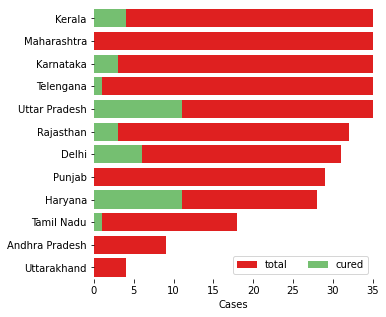

In [ ]:
f,ax=plt.subplots(figsize=(5,5))
data=df_full[['Name of State / UT','totalcases','Cured','Death']]
data.sort_values('totalcases',ascending=False,inplace=True)
sns.barplot(x='totalcases',y='Name of State / UT',data=data,label='total',color='r')
sns.set_color_codes('muted')
sns.barplot(x='Cured',y='Name of State / UT',data=data,label='cured',color='g')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)


In [ ]:
import plotly
plotly.io.renderers.default='colab'

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_ind['Date'],y=dbd_ind['Total Cases'],mode='lines+markers',name='totalcases'))
fig.update_layout(title_text='Corona Trend')
fig.add_trace(go.Scatter(x=dbd_ind['Date'],y=dbd_ind['New Cases'],mode='lines+markers',name='newcases'))
fig.show()


In [ ]:
import plotly.express as px
fig=px.bar(dbd_ind,x="Date",y='Total Cases')
fig.show()
fig=px.bar(dbd_italy,x='Date',y="Total Cases")
fig.show()
fig=px.bar(dbd_korea,x='Date',y='Total Cases')
fig.show()
fig=px.bar(dbd_wuhan,x='Date',y='Total Cases')
fig.show()


In [ ]:
df=pd.read_csv('/covid_19_clean_complete.csv')
df_confirmed=pd.read_csv('/time_series_covid19_confirmed_global.csv')
df_deaths=pd.read_csv('/time_series_covid19_deaths_global.csv')
df_recovered=pd.read_csv('/time_series_covid19_recovered_global.csv')
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)



In [ ]:
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,1/22/20,Australia,Australian Capital Territory,0.0,0.0,0.0
1,1/22/20,Australia,From Diamond Princess,0.0,0.0,0.0
2,1/22/20,Australia,New South Wales,0.0,0.0,0.0
3,1/22/20,Australia,Northern Territory,0.0,0.0,0.0
4,1/22/20,Australia,Queensland,0.0,0.0,0.0


In [ ]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.groupby('Date').sum().head()


,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
1/22/20,7777.4793,1639.7021,554.0,17.0,28.0
1/23/20,7777.4793,1639.7021,652.0,18.0,30.0
1/24/20,7777.4793,1639.7021,939.0,26.0,36.0
1/25/20,7777.4793,1639.7021,1432.0,42.0,39.0
1/26/20,7777.4793,1639.7021,2113.0,56.0,52.0


In [ ]:
deaths=df.groupby('Date').sum()['Deaths'].reset_index()

confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()
deaths.head()

,Date,Deaths
0,1/22/20,17.0
1,1/23/20,18.0
2,1/24/20,26.0
3,1/25/20,42.0
4,1/26/20,56.0


In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=10,yaxis=dict(title='Number of Cases'))
fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [ ]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=100)
future.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
157,2020-06-27
158,2020-06-28
159,2020-06-29
160,2020-06-30
161,2020-07-01


In [ ]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
157,2020-06-27,1.781696e+06,1.243430e+06,2.317244e+06
158,2020-06-28,1.798329e+06,1.253245e+06,2.340462e+06
159,2020-06-29,1.811551e+06,1.266756e+06,2.369134e+06
160,2020-06-30,1.824122e+06,1.274877e+06,2.385939e+06
161,2020-07-01,1.839198e+06,1.274150e+06,2.412230e+06


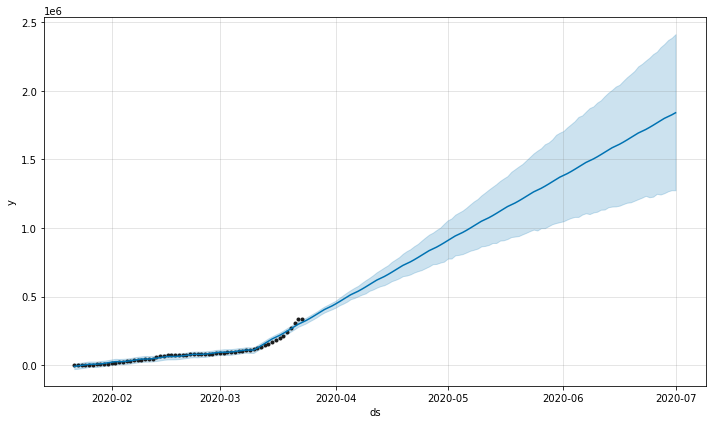

In [ ]:
forecast_plot=m.plot(forecast)

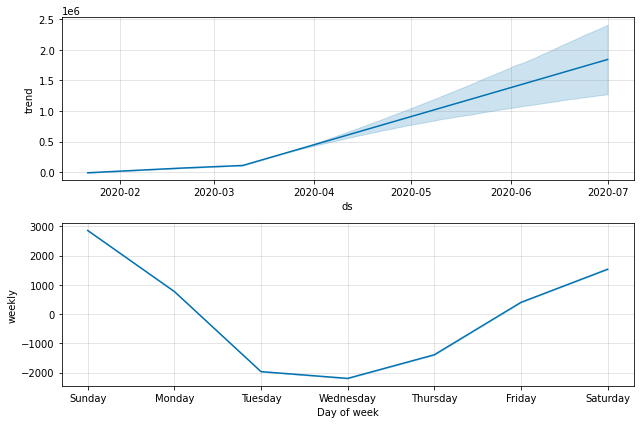

In [ ]:
components_plot=m.plot_components(forecast)

In [ ]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])


In [ ]:
m=Prophet(interval_width=0.95)
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14427.580972,16376.232857
65,2020-03-27,16199.617603,15205.011721,17164.754337
66,2020-03-28,17006.904589,16070.060071,17940.362085
67,2020-03-29,17831.505383,16856.276733,18898.358911
68,2020-03-30,18490.986176,17471.260434,19591.505857


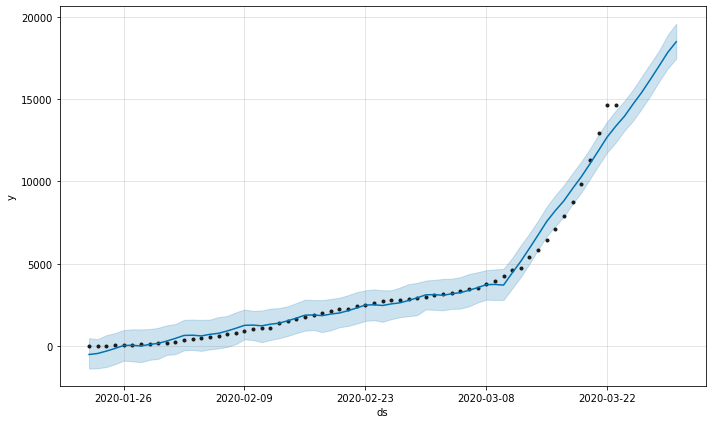

In [ ]:
k=m.plot(forecast)

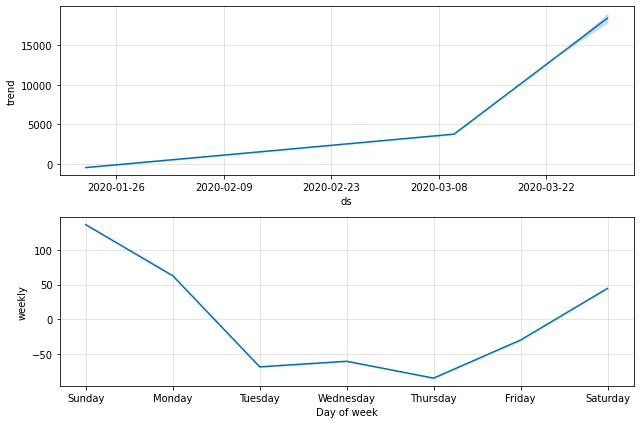

In [ ]:
r=m.plot_components(forecast)

In [ ]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])
m=Prophet(interval_width=0.95)
m.fit(recovered)
future=m.make_future_dataframe(periods=7)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101301.713580,104755.734230
65,2020-03-27,105338.025042,103402.462293,107213.140607
66,2020-03-28,108256.310813,106044.023095,110612.750444
67,2020-03-29,111119.296170,108705.028641,113442.022828
68,2020-03-30,113244.961749,110566.047734,116002.990761


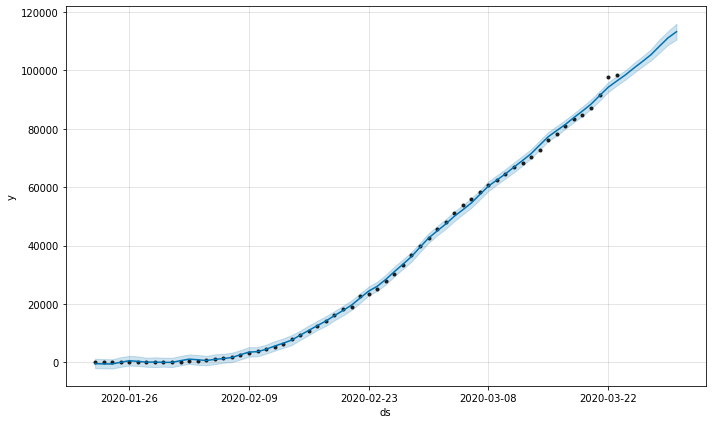

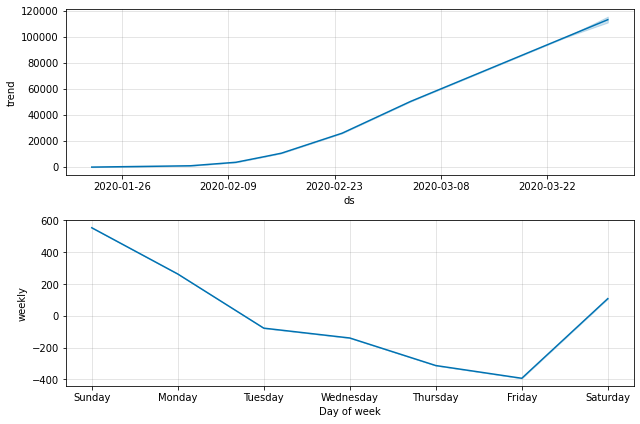

In [ ]:
k=m.plot(forecast)
r=m.plot_components(forecast)

# New Section